### Librerías importadas

In [92]:
import pandas as pd
from sklearn.model_selection import train_test_split as split
from sklearn import metrics
from sklearn.metrics import confusion_matrix as cm
from tensorflow import keras as kr
from tensorflow.keras import layers
import matplotlib.pyplot as plt

### Carga de datos

In [93]:
datos = pd.read_csv('Housing.csv')
list(datos) # Muestra una lista de las columnas.

['crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'b',
 'lstat',
 'medv']

In [94]:
X = datos.iloc[:,:-2]
y = datos.iloc[:,-1]

# Divide los datos
Xtn, Xtt, ytn, ytt = split(X, y, test_size = 0.2)


### Preprocesamiento

In [95]:
#Función de preprocesado
def pre(x):
    d = x.describe().transpose()
    return (x-d['mean'])/d['std']

In [96]:
# Preprocesando Xtn y Xtt
Xtn = pre(Xtn)
Xtt = pre(Xtt)
ytn = pre(ytn)
ytt = pre(ytt)


### Construye el modelo.

In [103]:
model = kr.Sequential([
layers.Dense(7, activation='relu', input_shape=(Xtn.shape[1],)),
layers.Dropout(0.3),
layers.Dense(10, activation='relu'),
layers.Dropout(0.3),
layers.Dense(1)
])

In [104]:
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [105]:
prey = model.fit(Xtn, ytn, epochs=150, validation_split = 0.2)

Epoch 1/150
11/11 [==============================] - 5s 170ms/step - loss: 3.9729 - mse: 3.9729 - val_loss: 3.5081 - val_mse: 3.5081
Epoch 2/150
11/11 [==============================] - 1s 59ms/step - loss: 3.0637 - mse: 3.0637 - val_loss: 3.1289 - val_mse: 3.1289
Epoch 3/150
11/11 [==============================] - 1s 62ms/step - loss: 2.6806 - mse: 2.6806 - val_loss: 2.8258 - val_mse: 2.8258
Epoch 4/150
11/11 [==============================] - 1s 59ms/step - loss: 2.8850 - mse: 2.8850 - val_loss: 2.6086 - val_mse: 2.6086
Epoch 5/150
11/11 [==============================] - 1s 60ms/step - loss: 2.0565 - mse: 2.0565 - val_loss: 2.4417 - val_mse: 2.4417
Epoch 6/150
11/11 [==============================] - 1s 55ms/step - loss: 1.9327 - mse: 1.9327 - val_loss: 2.2821 - val_mse: 2.2821
Epoch 7/150
11/11 [==============================] - 1s 58ms/step - loss: 1.9481 - mse: 1.9481 - val_loss: 2.1388 - val_mse: 2.1388
Epoch 8/150
11/11 [==============================] - 1s 60ms/step - loss: 1

In [106]:

def plot_metric(prey, metric):
    train_metrics = prey.history[metric]
    val_metrics = prey.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Entrenamiento y validación '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()



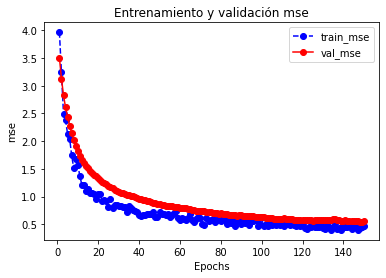

In [107]:
plot_metric(prey, 'mse')

In [112]:
loss, mse = model.evaluate(Xtt, ytt, verbose=2)

print("mse: ", mse)

4/4 - 0s - loss: 0.2854 - mse: 0.2854
mse:  0.28535398840904236
